In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data1h = pd.read_csv('../augmento_BTC_1h.csv')
data24h = pd.read_csv('../augmento_BTC_24h.csv')
data_twitter = pd.read_csv('../augmento_BTC_1h_twitter.csv')

In [3]:
sizePar = 10

sentiments = data24h.copy().drop(columns=["Date", "BTC_Price", "BTC_Volume"])

sentiments = sentiments.reindex(sentiments.mean().sort_values(ascending=True).index, axis=1)
#sentiments = sentiments.reindex(sentiments.corr().mean().sort_values(ascending=True).index, axis=1)

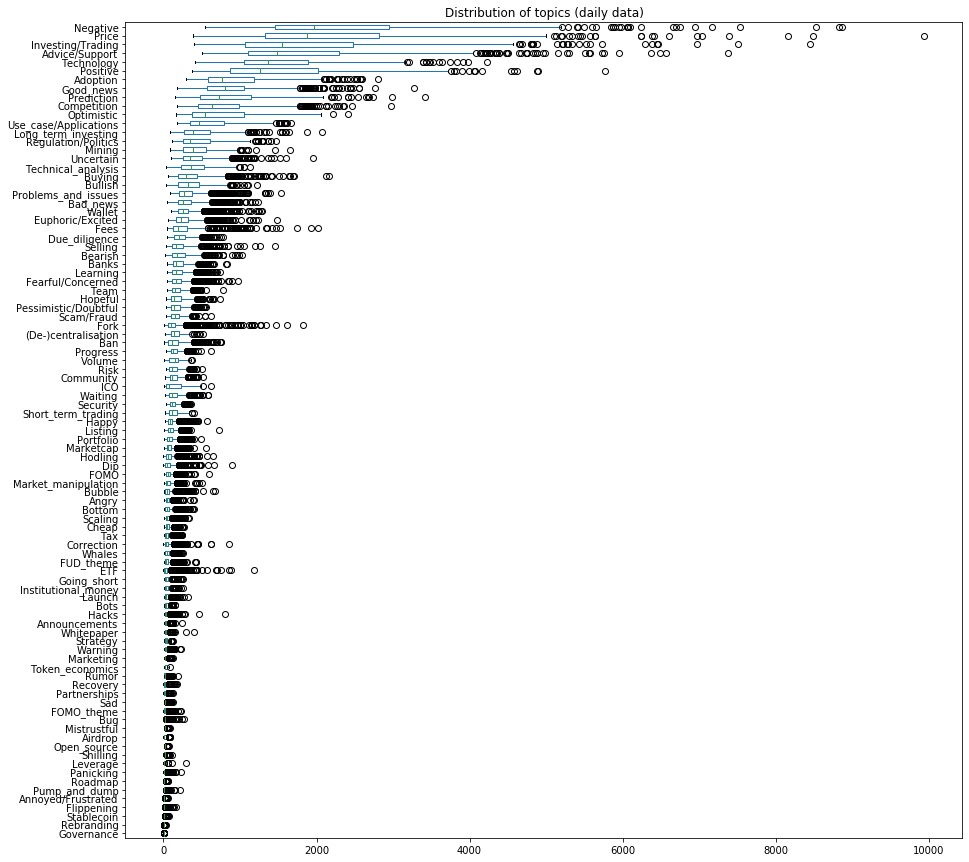

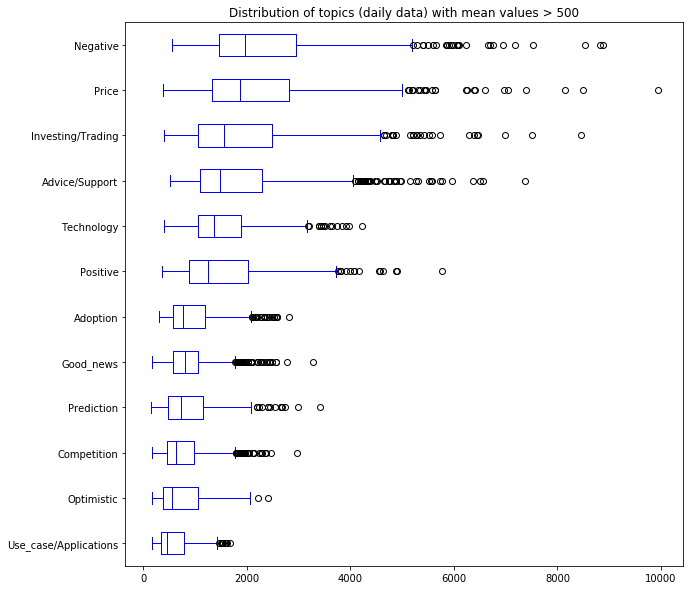

In [4]:
# Visualize distribution of sentiments (daily data):

plot = sentiments.plot(kind="box", vert=False, figsize=(sizePar*1.5, sizePar*1.5))
plot.set_facecolor("none")
plot.set(title="Distribution of topics (daily data)")
plot.figure.savefig("topics_distr1.png", transparent=True)

select_columns = sentiments.columns[sentiments.mean() > 500].tolist()

plot = sentiments[select_columns].plot(kind="box", vert=False, color="blue", figsize=(10,10))
plot.set_facecolor("none")
plot.set(title="Distribution of topics (daily data) with mean values > 500")
plot.figure.savefig("topics_distr2.png", transparent=True)

In [5]:
# The lowest and the highest correlations:

tmp = sentiments.corr().mean().sort_values()

print(tmp[tmp < 0.5], "\n\n", 
      tmp[tmp > 0.78])

Stablecoin   -0.033813
ETF           0.032279
Bug           0.187936
Governance    0.303874
Fork          0.373897
Rebranding    0.402348
Flippening    0.408040
Hacks         0.414453
Leverage      0.427650
Bottom        0.442088
Bots          0.495086
dtype: float64 

 Pessimistic/Doubtful    0.780995
Hopeful                 0.787847
Competition             0.790090
Advice/Support          0.792662
Long_term_investing     0.795020
Uncertain               0.797191
Positive                0.797749
Investing/Trading       0.798366
Negative                0.802319
dtype: float64


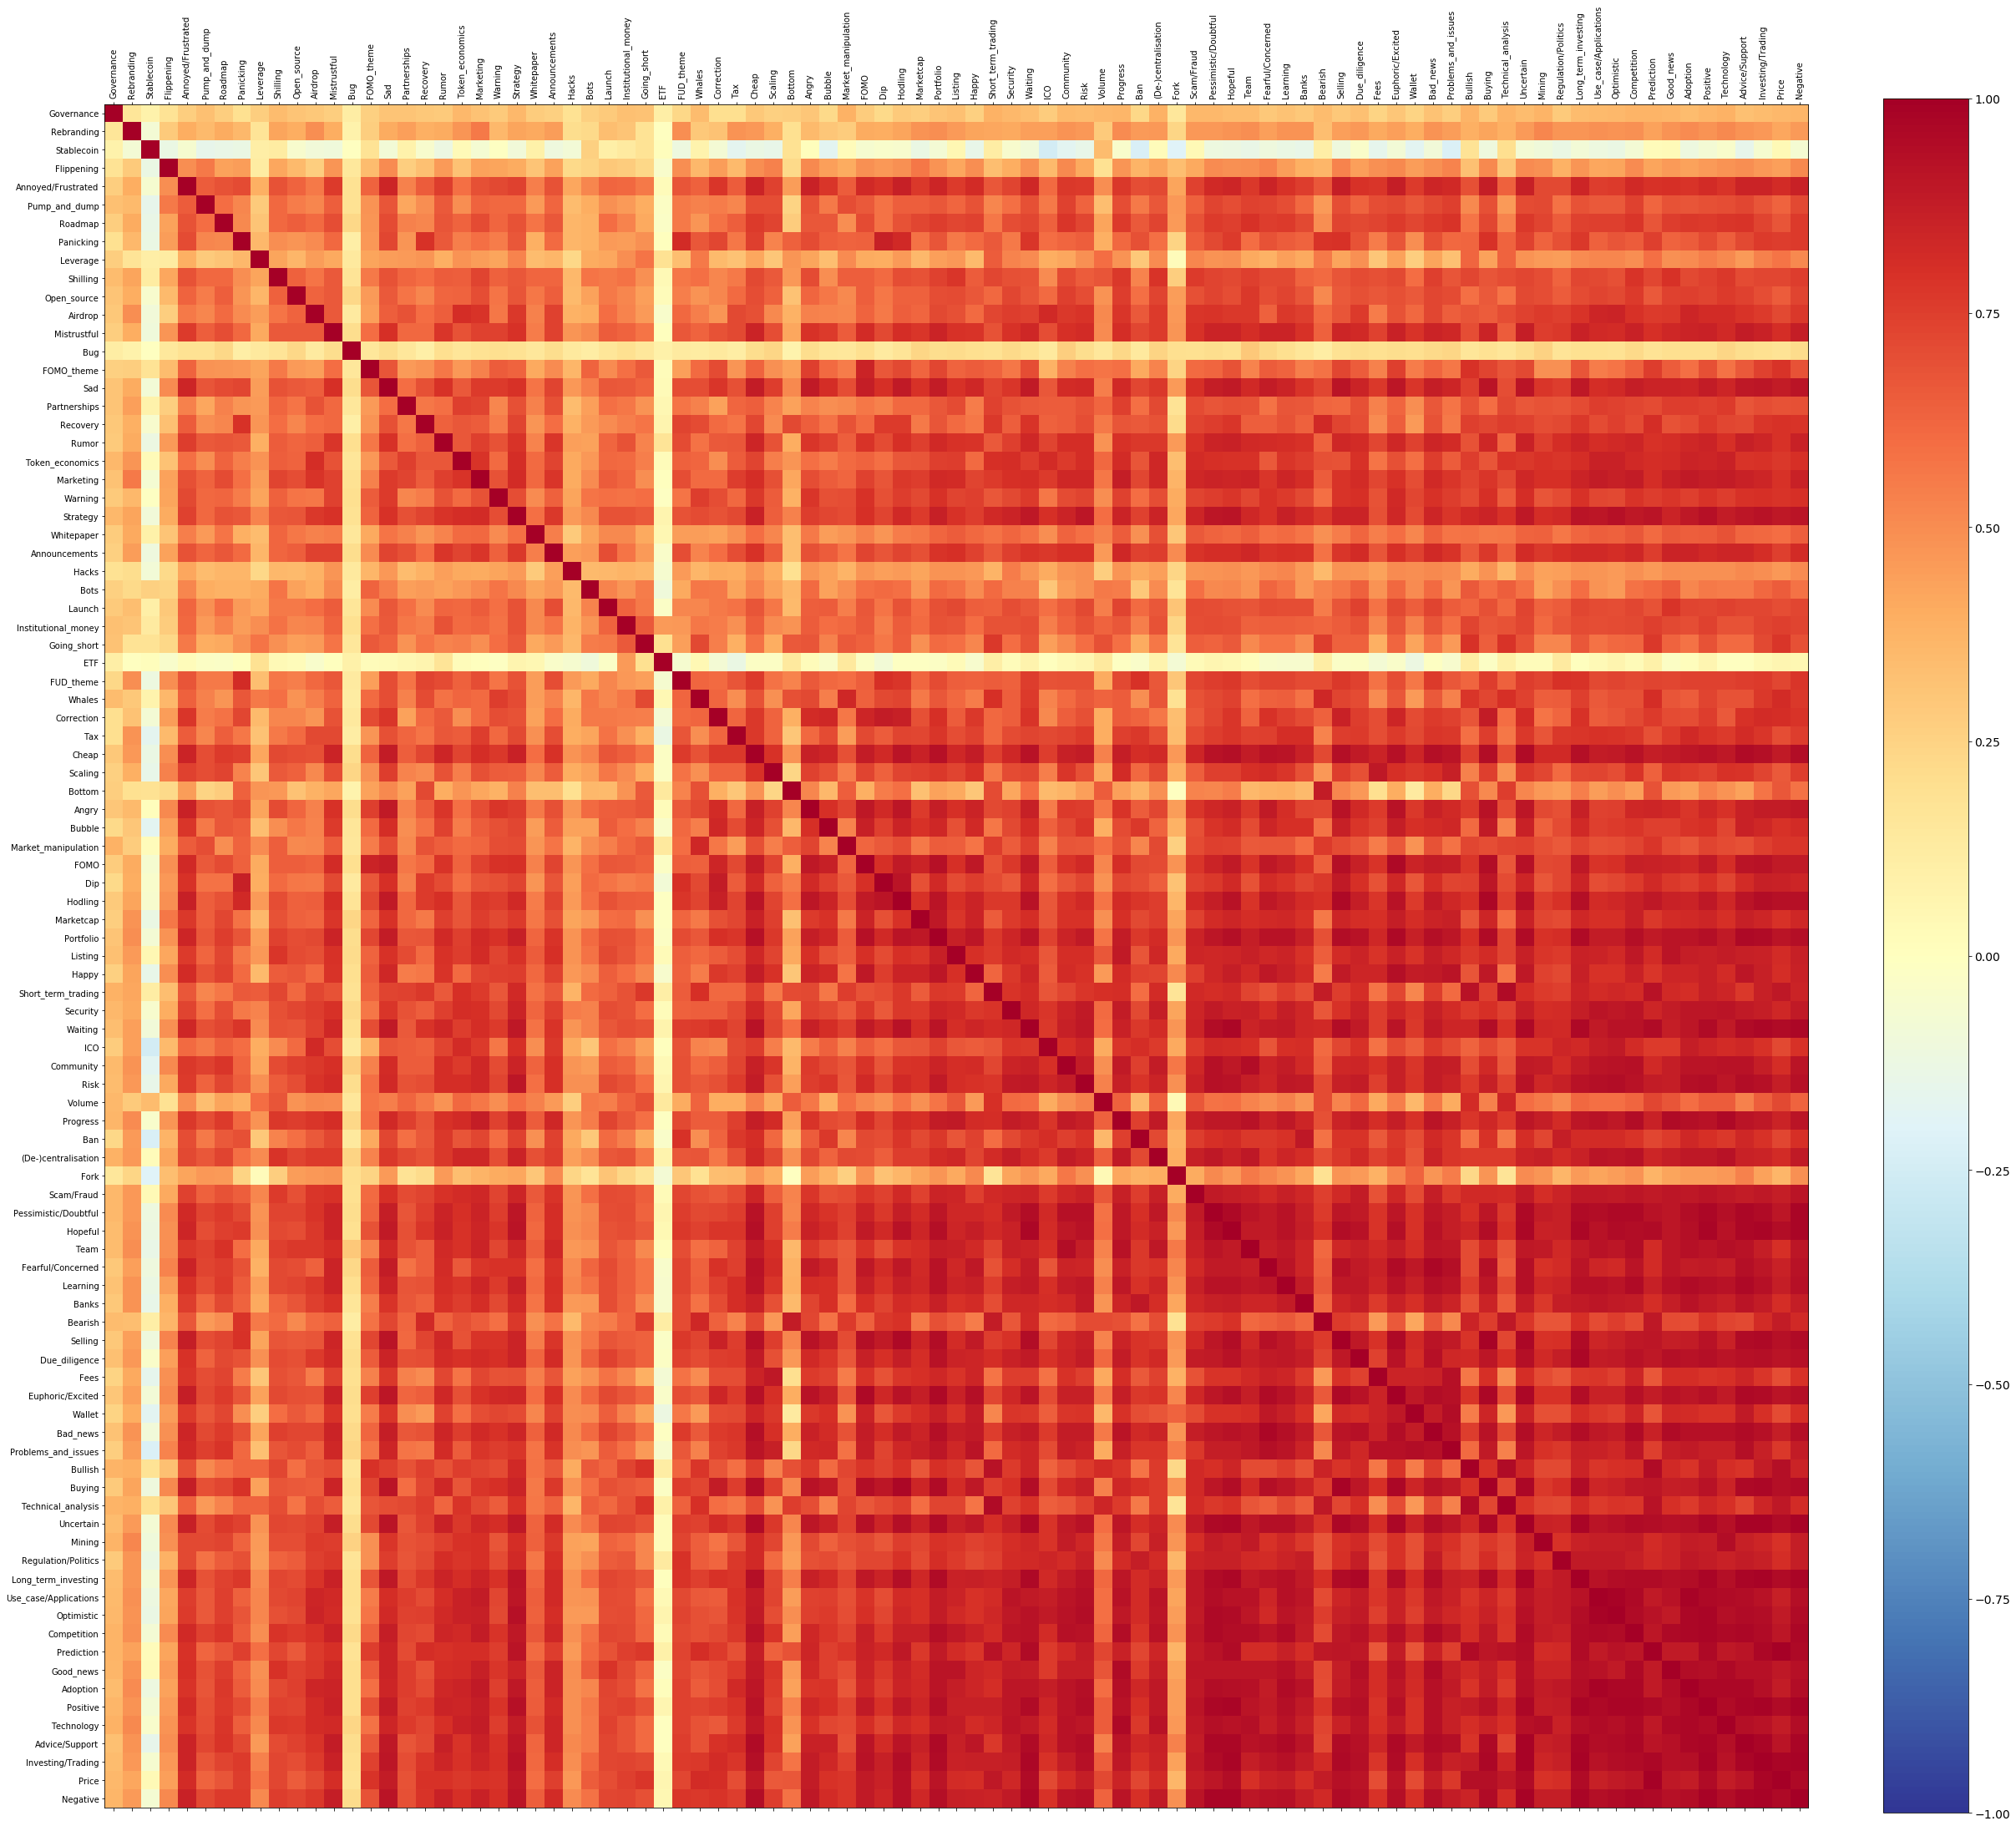

In [6]:
# Correlation plot for daily data

df = sentiments

f = plt.figure(figsize=(40, 40))
plt.matshow(df.corr(), fignum=f.number, cmap=plt.cm.RdYlBu_r)
plt.xticks(range(df.shape[1]), df.columns, fontsize=10, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=10)
plt.clim(-1,1)
cb = plt.colorbar(fraction=0.046, pad=0.04)
cb.ax.tick_params(labelsize=14)

f.savefig("corr_24h.png", transparent=True)

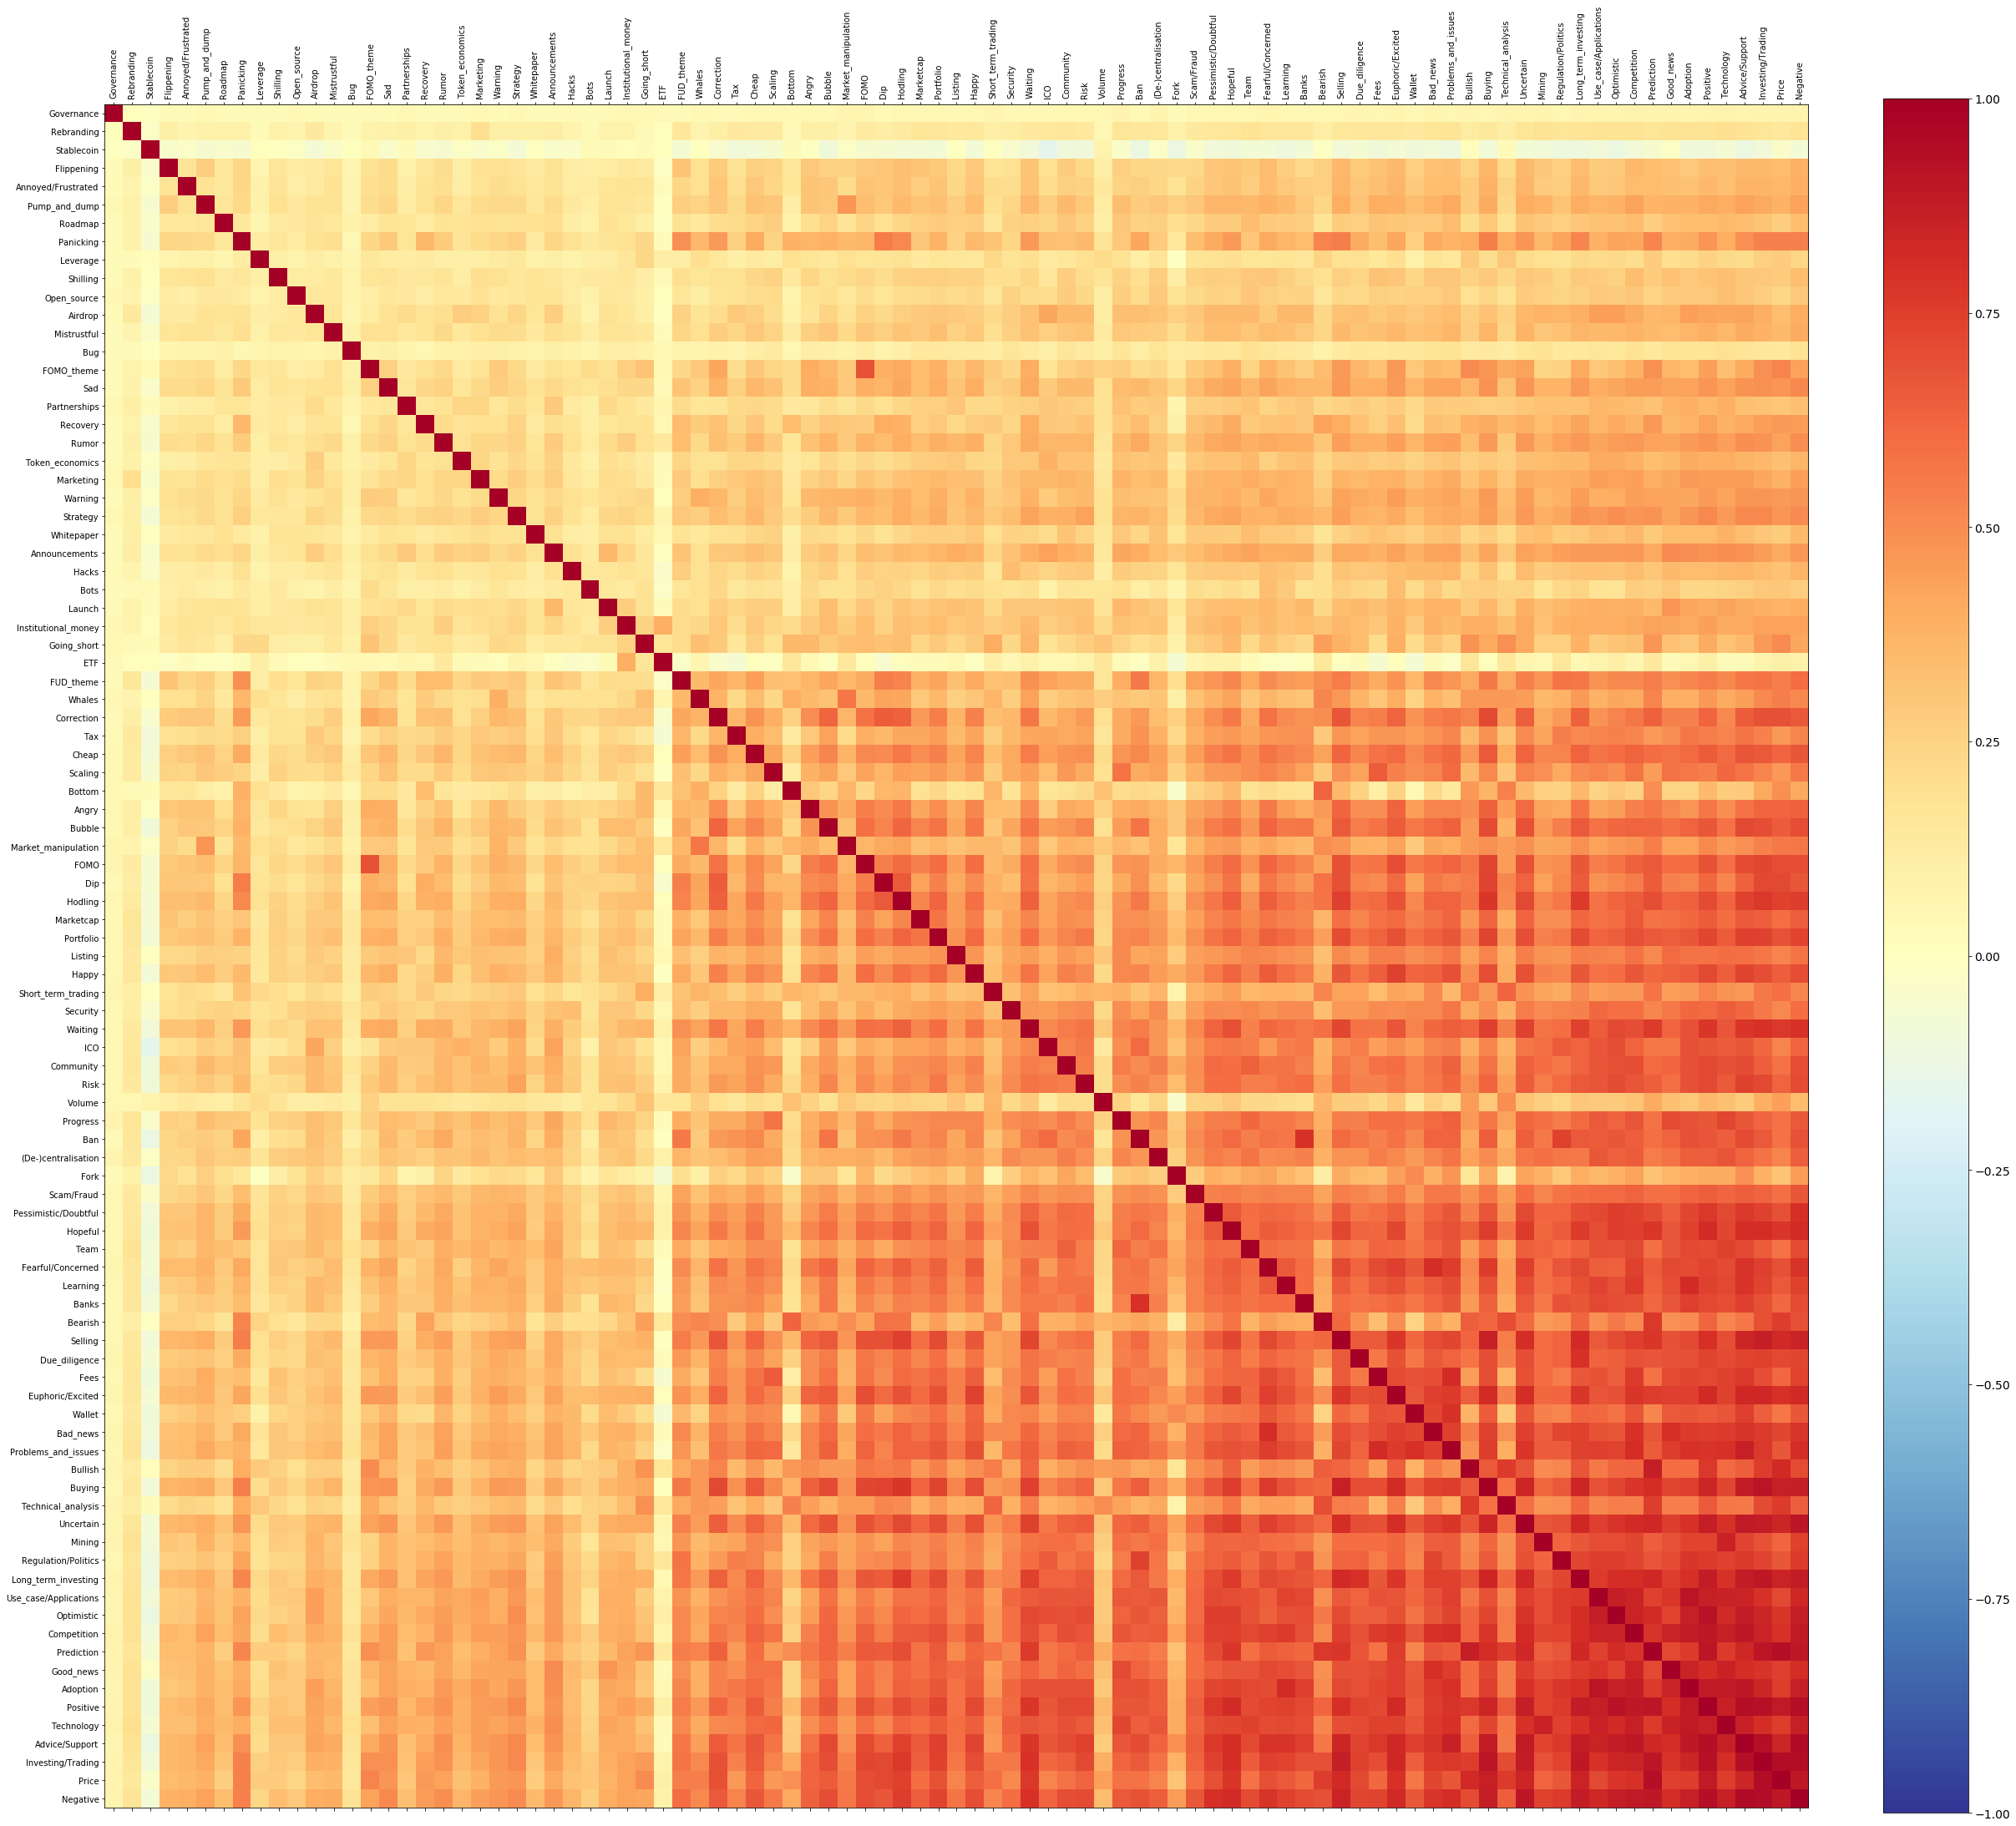

In [7]:
# Correlation plot for hourly data

df = data1h.copy().drop(columns="datetime").\
reindex(sentiments.mean().sort_values(ascending=True).index, axis=1)

f = plt.figure(figsize=(40, 40))
plt.matshow(df.corr(), fignum=f.number, cmap=plt.cm.RdYlBu_r)
plt.xticks(range(df.shape[1]), df.columns, fontsize=10, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=10)
plt.clim(-1,1)
cb = plt.colorbar(fraction=0.046, pad=0.04)
cb.ax.tick_params(labelsize=14)

f.savefig("corr_1h.png", transparent=True)

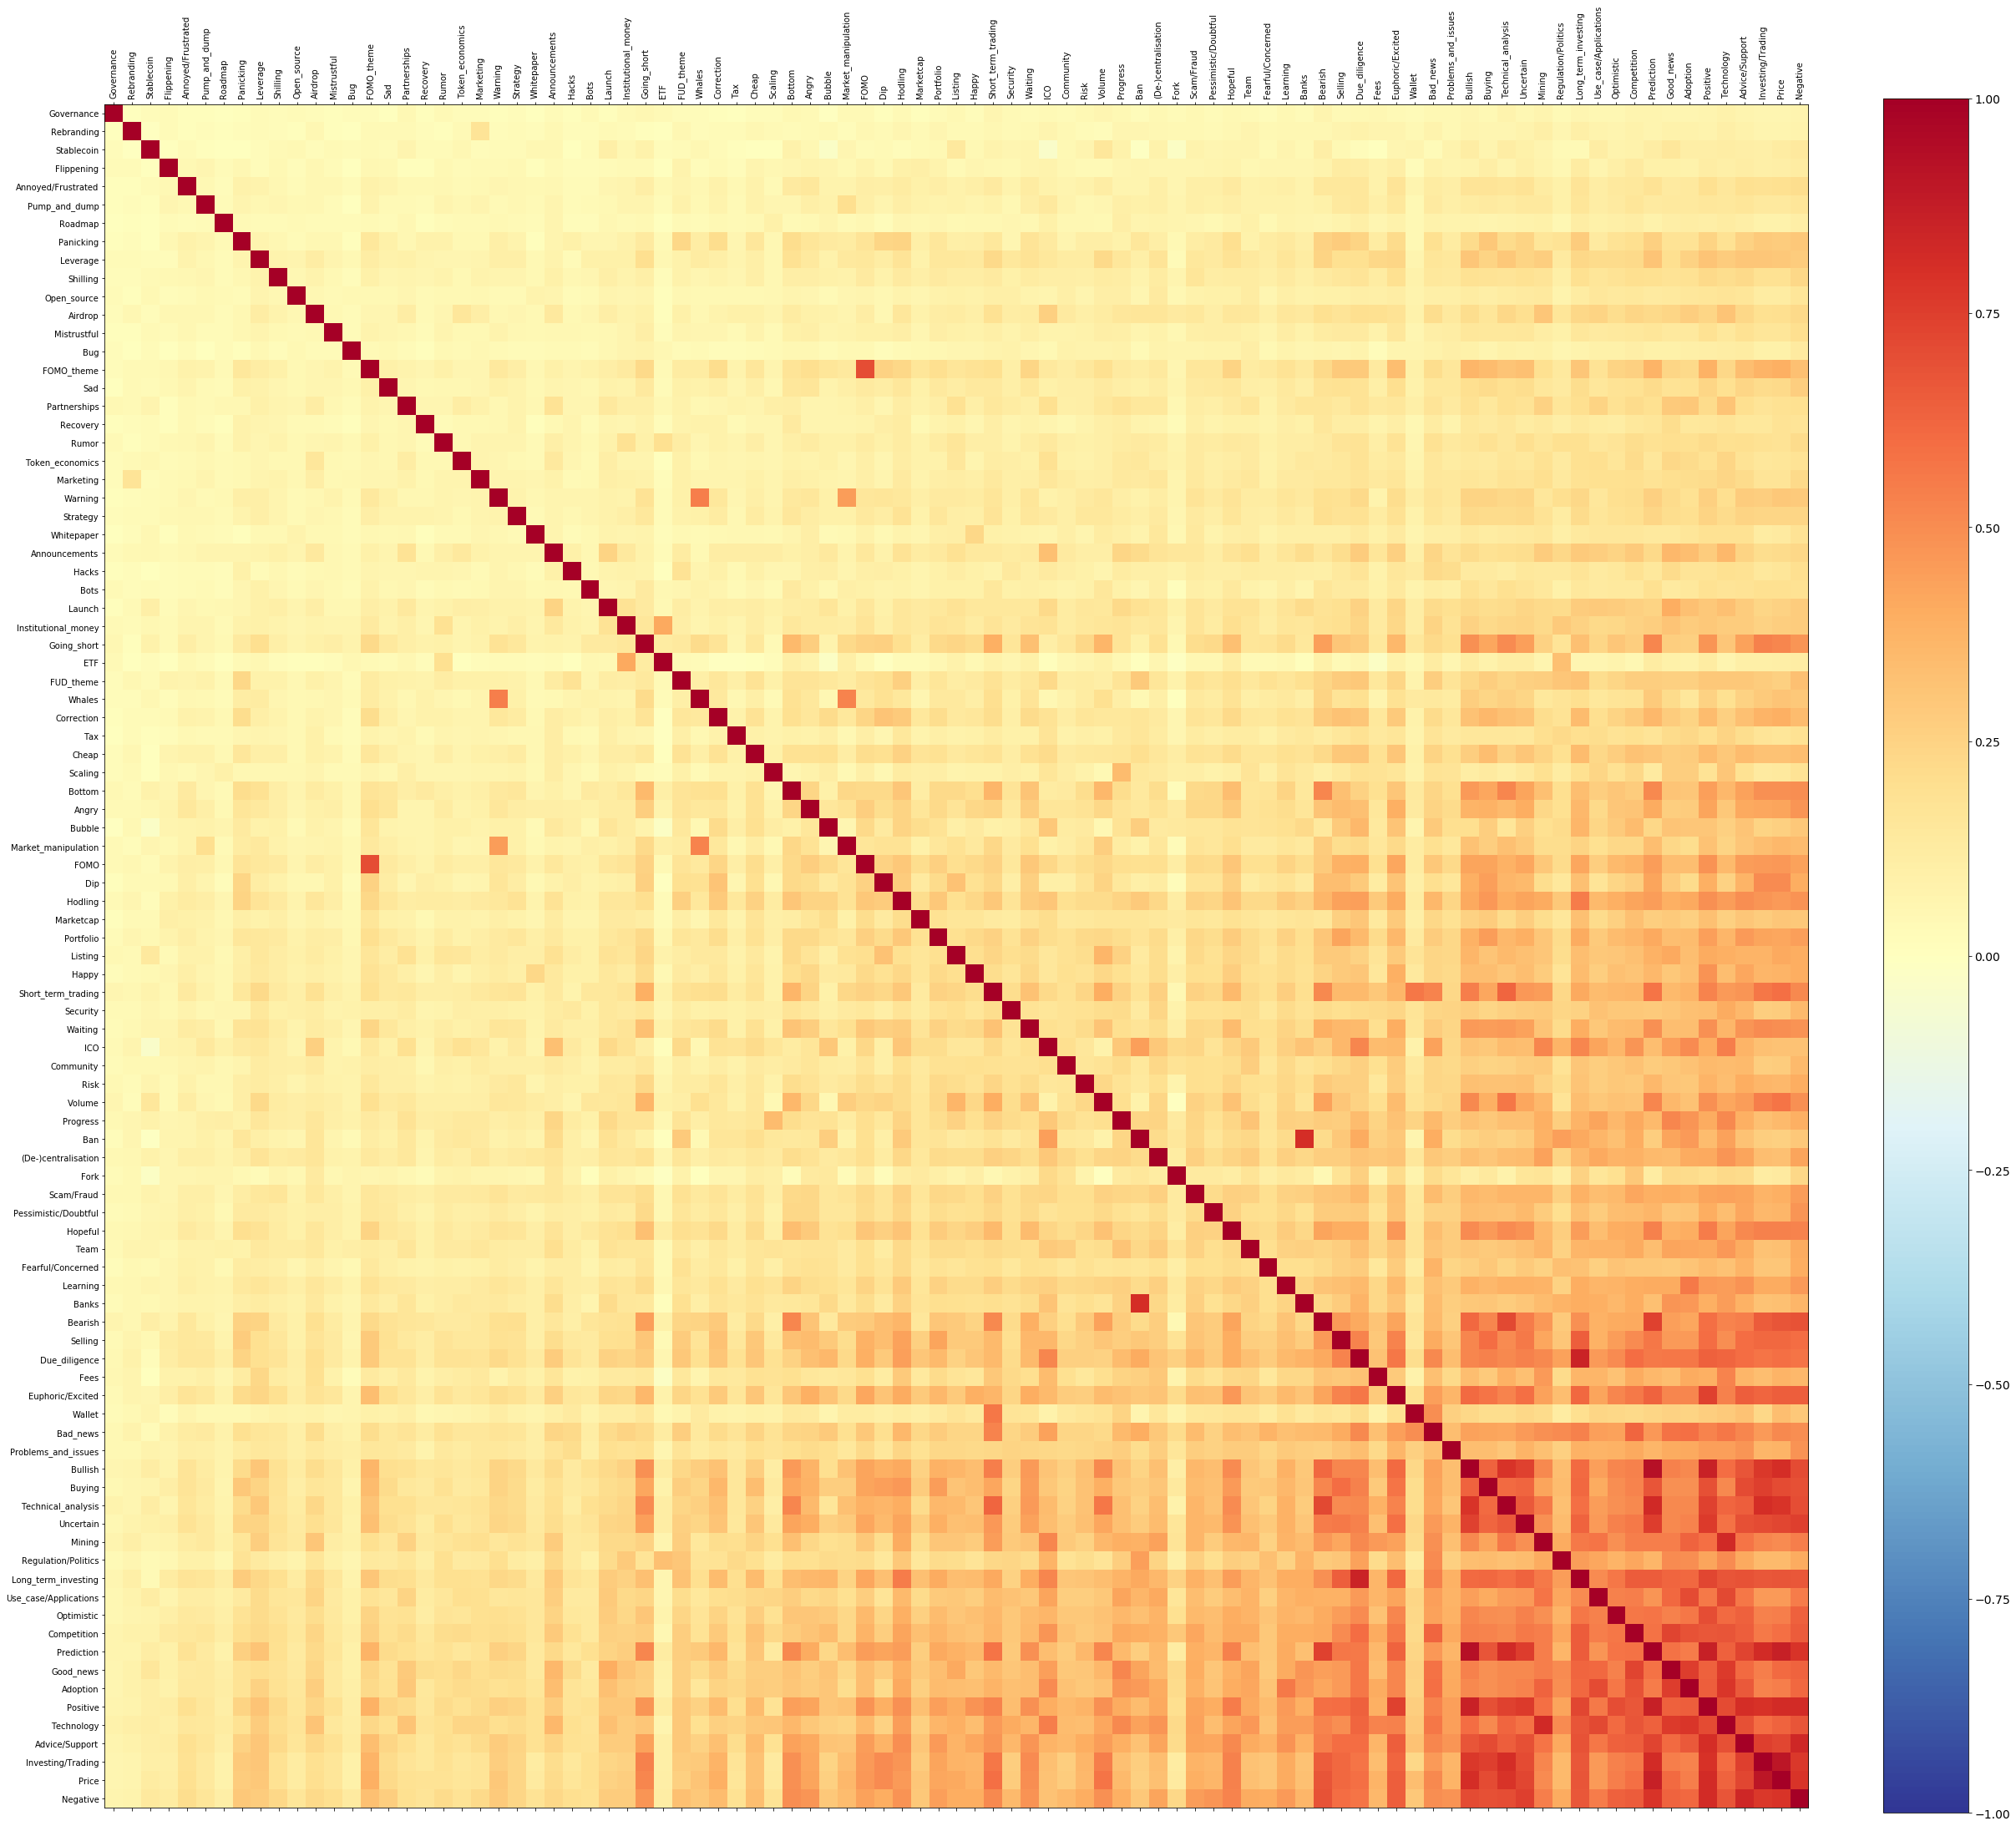

In [8]:
# Correlation plot for hourly data (twitter only)

df = data_twitter.\
reindex(sentiments.mean().sort_values(ascending=True).index, axis=1)

f = plt.figure(figsize=(40, 40))
plt.matshow(df.corr(), fignum=f.number, cmap=plt.cm.RdYlBu_r)
plt.xticks(range(df.shape[1]), df.columns, fontsize=10, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=10)
plt.clim(-1,1)
cb = plt.colorbar(fraction=0.046, pad=0.04)
cb.ax.tick_params(labelsize=14)

f.savefig("corr_1hTwitter.png", transparent=True)

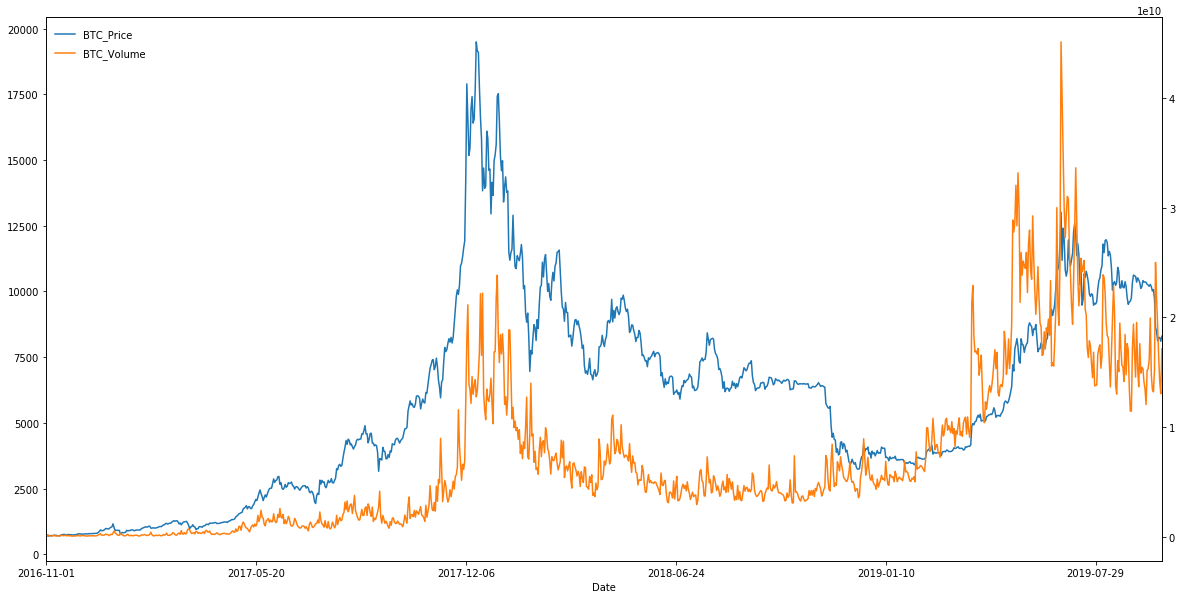

In [9]:
data24h = data24h.sort_values("Date")

ax1 = data24h.plot(x="Date", y="BTC_Price", legend="Price", figsize=(sizePar*2, sizePar))
ax2 = data24h.plot(x="Date", y="BTC_Volume", legend="Volume", secondary_y=True, ax=ax1)

from matplotlib.ticker import ScalarFormatter
ax1.legend(loc = (.005, .95), frameon = False)
ax2.legend(loc = (.005, .915), frameon = False)

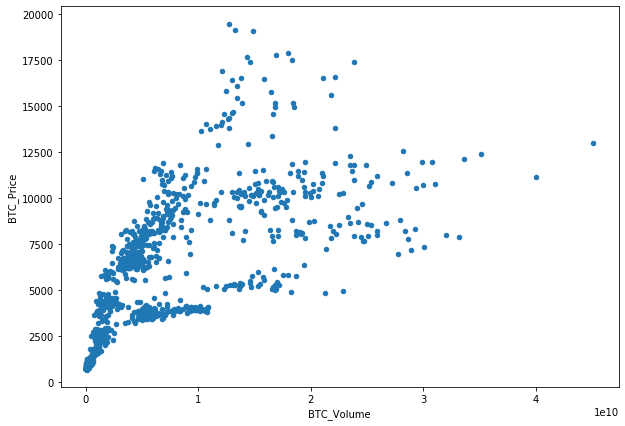

In [10]:
data24h.plot.scatter(x="BTC_Volume", y="BTC_Price", figsize=(sizePar, sizePar*0.7))

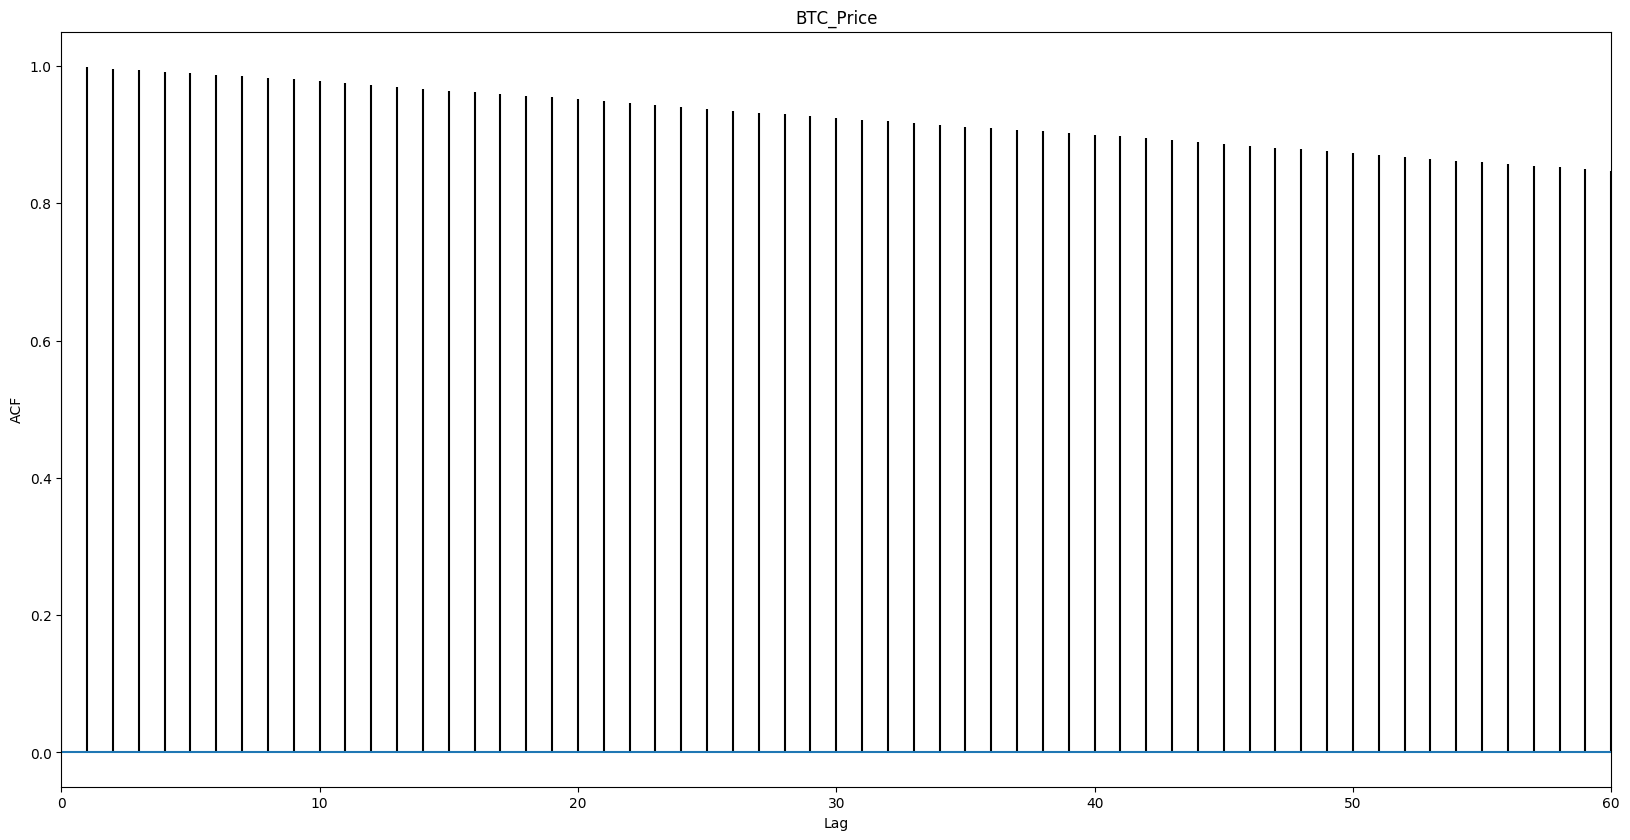

In [11]:
# Plot autocorrelation

data = np.array(data24h.BTC_Price)

plt.figure(num=None, figsize=(20, 10), dpi=100, facecolor='w', edgecolor='k')

plt.acorr(data, maxlags=120)
plt.xlim(0,60)
plt.title('BTC_Price')
plt.xlabel('Lag')
plt.ylabel('ACF')

plt.savefig('autocor_Price.png', transparent=True)